In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from keras.models import load_model
from keras.utils import np_utils

from sklearn import metrics

import data_utils as my_utils


Using TensorFlow backend.


In [2]:
df = pd.read_csv("fer2013.csv")

In [3]:
emotion_labels = {0: "Angry", 1: "Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}
labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [4]:
def plot_counts(df, labels):
    
    fig = plt.figure(figsize=(16,4))
    axes = fig.subplots(1, 3)
    uses = ['Training', 'PrivateTest', 'PublicTest']
    cmap = plt.cm.get_cmap('Pastel1', 7)
    my_colors = [cmap(i) for i in range(7)]
#     my_colors = ['red', 'green', 'purple', 'yellow', 'blue', 'orange', 'brown']
    for i in range(3):
        ax = axes[i]
        use = uses[i]
        data = df[df['Usage']==use]['emotion'].value_counts().sort_index()

        ax.bar(np.arange(len(labels)), data, color=my_colors, edgecolor='black')
        ax.set_xticks(np.arange(0,8,1))
        
        ax.set_xticklabels(labels, rotation=60, fontsize=14)
        ax.set_title(uses[i]+" Data")
    fig.savefig('Data_distribution.png')
    plt.show()
    

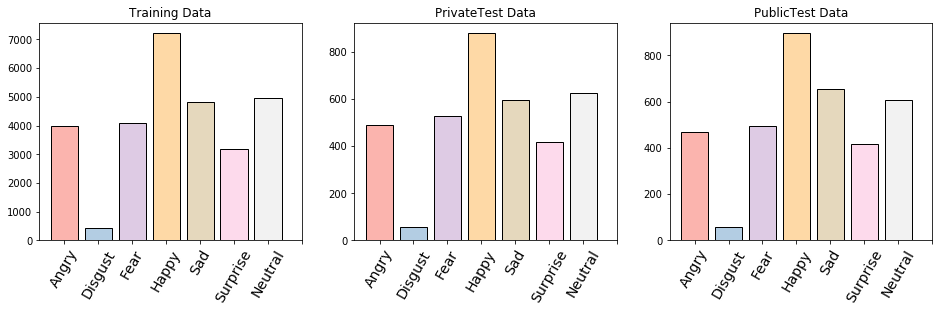

In [5]:
plot_counts(df, labels)

In [6]:
model = load_model('expression_recognition_model.h5')

In [7]:
x_test, y_test = my_utils.process_data(df, "PrivateTest")
y_predicted_probs = model.predict(x_test, verbose=1)


/Users/ritvikareddy 1/Documents/GitHub/ml-project/venv/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/ritvikareddy 1/Documents/GitHub/ml-project/data_utils.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lambda pixel_str: np.fromstring(pixel_str, sep=' '))


3589/3589 [==============================] - 18s 5ms/step


In [8]:
score = model.evaluate(x_test, y_test, verbose=1)

3589/3589 [==============================] - 19s 5ms/step


In [9]:
print("Metrics: ", model.metrics_names)
print("Loss on test data", score[0])
print("Test Accuracy", score[1])

Metrics:  ['loss', 'acc']
Loss on test data 1.0537144673770766
Test Accuracy 0.6062970187013679


In [10]:
y_predicted_labels = my_utils.convert_probs_to_labels(y_predicted_probs, labels)
y_actual_labels = my_utils.convert_probs_to_labels(y_test, labels)

Confusion matrix, without normalization
[[239   1  40  47  47 106  11]
 [ 24  12   6   3   1   7   2]
 [ 73   1 145  31  54 154  70]
 [ 21   0  22 757  30  36  13]
 [ 35   1  25  44 366 141  14]
 [ 51   0  56  43  96 341   7]
 [  9   1  37  33  11   9 316]]


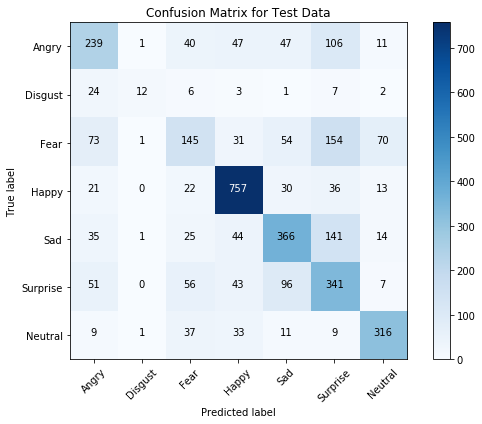

In [11]:
cnf_matrix = metrics.confusion_matrix(y_actual_labels, y_predicted_labels)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = my_utils.plot_confusion_matrix(cnf_matrix, classes=labels,
                                     title='Confusion Matrix for Test Data')
plt.show()
fig.savefig('confusion_matrix.png')

In [58]:
def plot_image_with_results(image_pixels, predicted_probs, labels):
    
    fig = plt.figure(figsize=(6,3))
    cmap = plt.cm.get_cmap('Pastel1', 7)
    my_colors = [cmap(i) for i in range(7)]
    
    ax_img, ax_probs = fig.subplots(1,2)
    
    ax_img.imshow(image_pixels, cmap=plt.cm.gray)
    ax_probs.bar(np.arange(len(labels)), predicted_probs[0], color=my_colors, edgecolor='black')
    ax_probs.set_xticks(np.arange(0,8,1))
    ax_probs.set_xticklabels(labels, rotation=60, fontsize=12)
    ax_probs.set_yticks(np.arange(0.0, 1.1, 0.5))
    plt.tight_layout()
    return fig
    

In [59]:
def predict_emotion(image_path, model, labels):
    img_pixels, predicted_probs = my_utils.test_for_single_image(image_path, model, labels)
    fig = plot_image_with_results(img_pixels, predicted_probs, labels)
    plt.show()

This image is classified to be Happy with 81.39% confidence


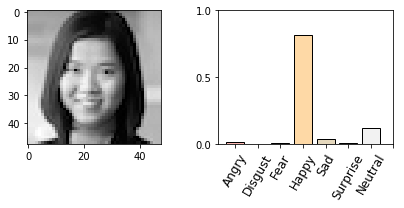

In [60]:
predict_emotion('rose3.jpg', model, labels)

In [64]:
report = metrics.classification_report(y_actual_labels, y_predicted_labels, 
                                       target_names=labels)
print(report)

              precision    recall  f1-score   support

       Angry       0.53      0.49      0.51       491
     Disgust       0.75      0.22      0.34        55
        Fear       0.44      0.27      0.34       528
       Happy       0.79      0.86      0.82       879
         Sad       0.60      0.58      0.59       626
    Surprise       0.43      0.57      0.49       594
     Neutral       0.73      0.76      0.74       416

   micro avg       0.61      0.61      0.61      3589
   macro avg       0.61      0.54      0.55      3589
weighted avg       0.60      0.61      0.60      3589



In [65]:
type(report)

str